In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [18, 12]

In [3]:
news_df = pd.read_csv('../data/google_news_weekly_timeseries.csv')
trends_df = pd.read_csv('../data/google_trends_data.csv')
traffic_df = pd.read_csv('../data/google_analytics_traffic.csv')

In [4]:
news_df['datetime'] = pd.to_datetime(news_df['datetime'])
trends_df['week'] = pd.to_datetime(trends_df['week'])

In [5]:
traffic_df['date'] = pd.to_datetime(traffic_df['date'])

In [6]:
traffic_df = traffic_df.set_index('date')
traffic_df = traffic_df.groupby(pd.Grouper(freq='1w'))['users'].sum().reset_index()

<AxesSubplot:xlabel='date', ylabel='users'>

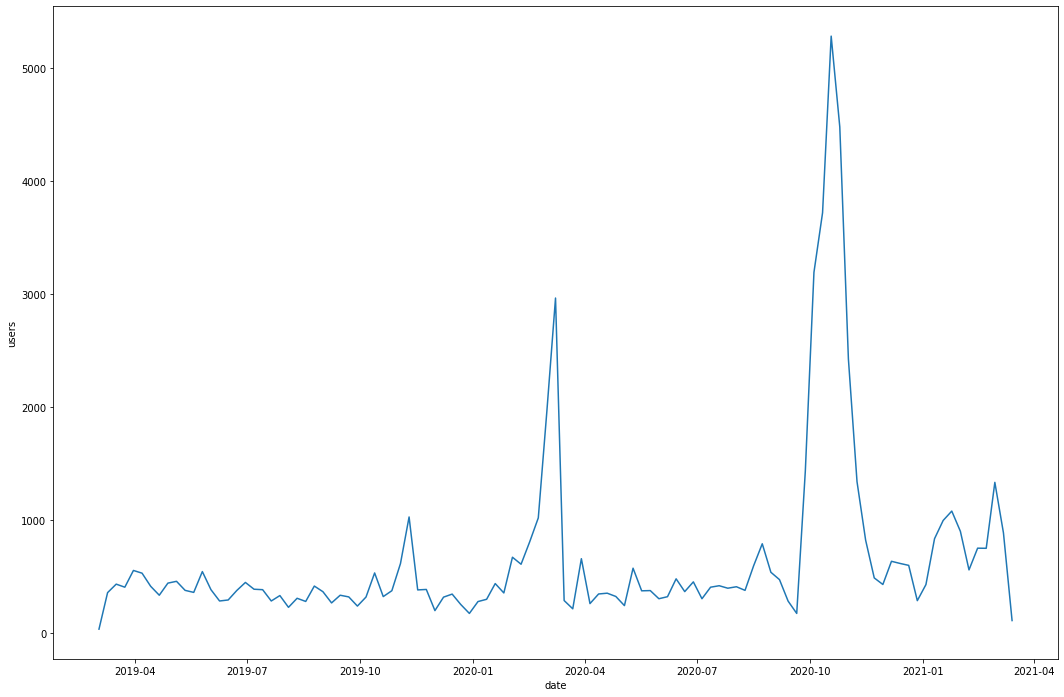

In [7]:
sns.lineplot(x='date', y='users', data=traffic_df.sort_values(by='date'))

<AxesSubplot:xlabel='week', ylabel='trend_value'>

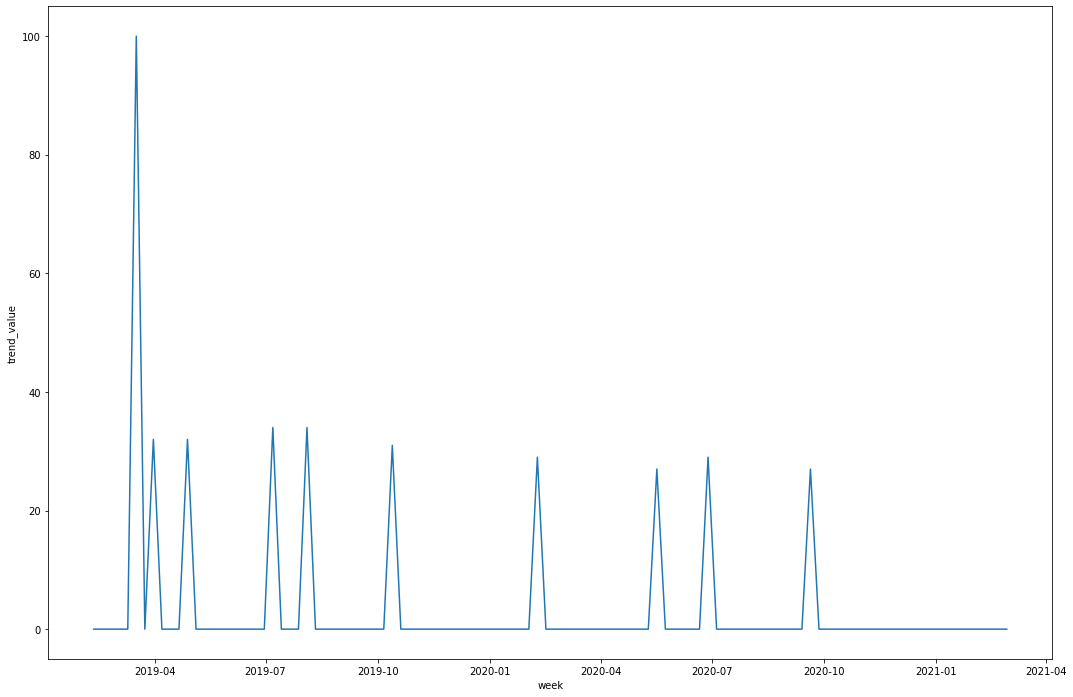

In [8]:
sns.lineplot(x='week', y='trend_value', data=trends_df.sort_values(by='week'))

<AxesSubplot:xlabel='datetime', ylabel='article_count'>

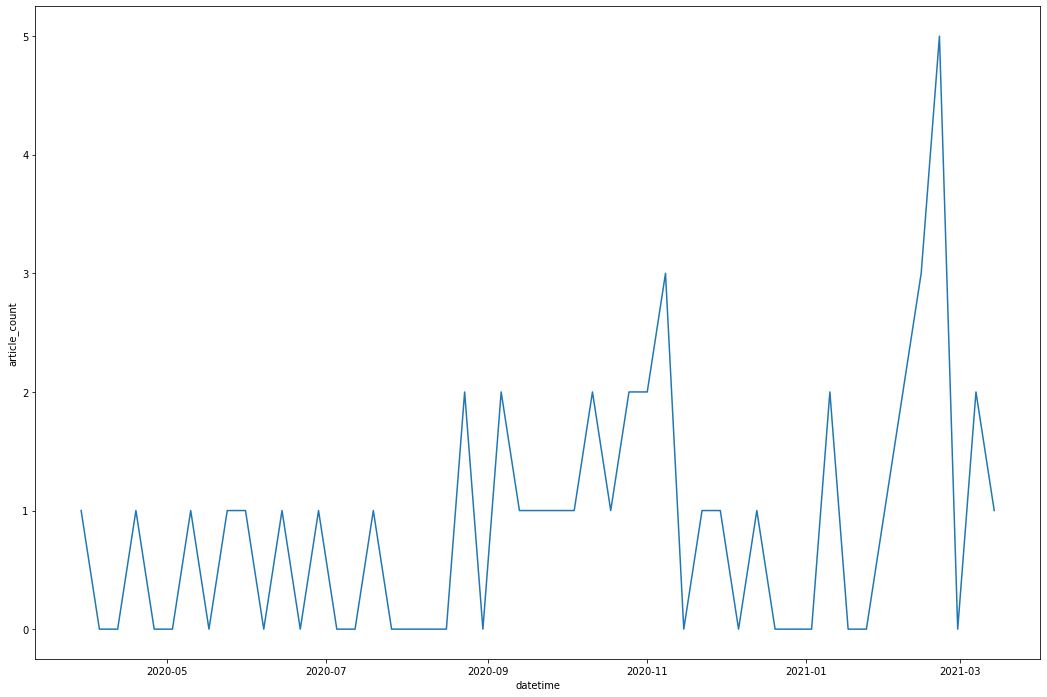

In [9]:
sns.lineplot(x='datetime', y='article_count', data=news_df.sort_values(by='datetime'))

In [10]:
merge_df_1 = pd.merge(left=news_df, right=traffic_df, left_on='datetime', right_on='date', how='inner').drop(labels=['date'], axis=1)
merge_df_1.head()

,datetime,article_count,users
0,2020-03-29,1,661
1,2020-04-05,0,264
2,2020-04-12,0,349
3,2020-04-19,1,356
4,2020-04-26,0,327


In [11]:
merged_df = merge_df_1.merge(trends_df, left_on='datetime', right_on='week', how='inner').drop(labels='week', axis=1)
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])
merged_df.head()

,datetime,article_count,users,trend_value
0,2020-03-29,1,661,0
1,2020-04-05,0,264,0
2,2020-04-12,0,349,0
3,2020-04-19,1,356,0
4,2020-04-26,0,327,0


In [12]:
merged_df.to_csv('../data/combined_weekly_data.csv', index=False)

<AxesSubplot:label='c0b23e66-0eff-447f-a876-5bc1c6919413'>

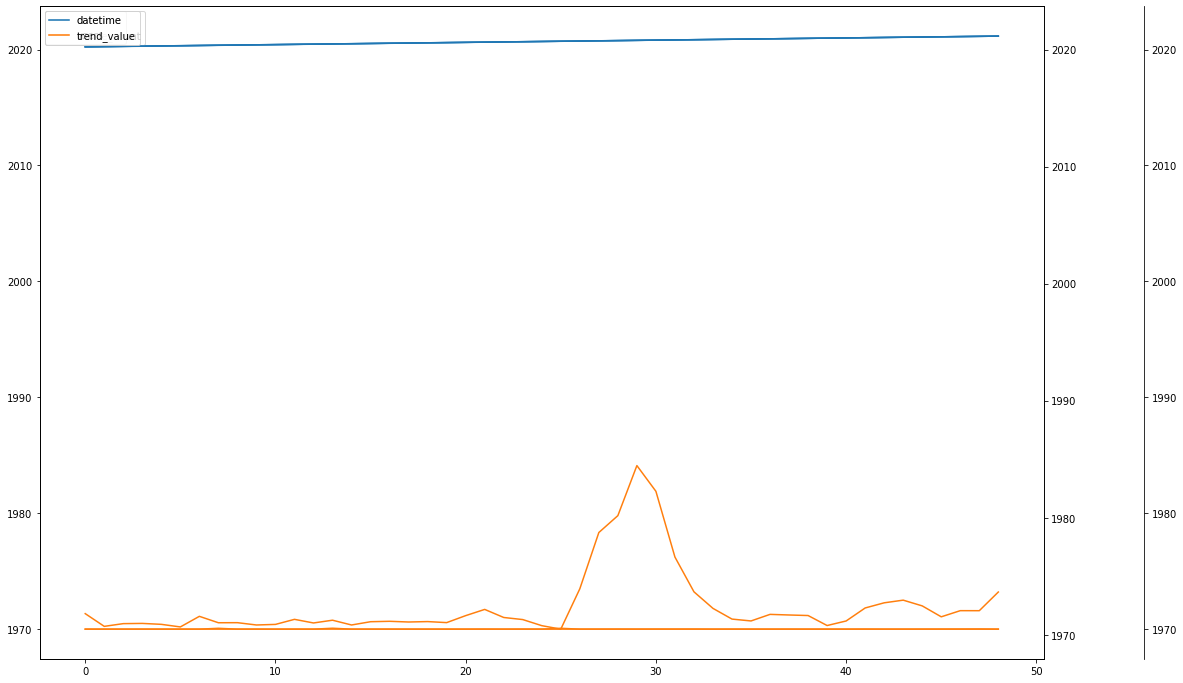

In [13]:
## I'll fix this later...
ax1 = merged_df[['datetime', 'article_count']].plot()

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
merged_df[['datetime', 'users']].plot(ax=ax2)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
merged_df[['datetime', 'trend_value']].plot(ax=ax3)

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [26]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

In [27]:
fig.add_trace(
    go.Scatter(x=merged_df.datetime, y=merged_df.article_count, name='articles')
)

fig.add_trace(
    go.Scatter(x=merged_df.datetime, y=merged_df.users, name='site_visits', yaxis="y2"),
)

"""fig.add_trace(
    go.Scatter(x=merged_df.datetime, y=merged_df.trend_value, name='google_trends', yaxis="y3"),
)"""

fig.show()